## Simple SciKit Learn Example

#### Load Python Libraries

In [17]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Load Datasets

#### Split Data into Training and Test Sets

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

#### Instantiate the Pipeline

In [8]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('pca', PCA(n_components = 4)), ('std', StandardScaler()), ('Decision_tree', DecisionTreeClassifier())], verbose = True)

#### Display Pipeline

In [9]:
from sklearn import set_config

In [10]:
set_config(display="diagram")
pipeline

Pipeline(steps=[('pca', PCA(n_components=4)), ('std', StandardScaler()),
                ('Decision_tree', DecisionTreeClassifier())],
         verbose=True)

#### Fit Pipeline

In [5]:
 pipeline.fit(x_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing Decision_tree, total=   0.0s


Pipeline(steps=[('pca', PCA(n_components=4)), ('std', StandardScaler()),
                ('Decision_tree', DecisionTreeClassifier())],
         verbose=True)

In [6]:
# to see all the hyper parameters
pipeline.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=4)),
  ('std', StandardScaler()),
  ('Decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=4),
 'std': StandardScaler(),
 'Decision_tree': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 4,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'Decision_tree__ccp_alpha': 0.0,
 'Decision_tree__class_weight': None,
 'Decision_tree__criterion': 'gini',
 'Decision_tree__max_depth': None,
 'Decision_tree__max_features': None,
 'Decision_tree__max_leaf_nodes': None,
 'Decision_tree__min_impurity_decrease': 0.0,
 'Decision_tree__min_samples_leaf': 1,
 'Decision_tree__min_samples_split': 2,
 'Decision_tree__min_weight_fraction_leaf': 0.0,
 'Decision_tree__random_state': None,
 'Decision_tree__splitter': 'best'}

#### Plotting Validation Curves

In [11]:
from sklearn.model_selection import validation_curve

In [24]:
param_range = np.arange(5,40,5)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(),
    x_train,
    y_train,
    param_name="learning_rate",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

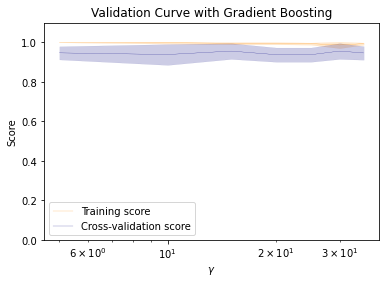

In [26]:
plt.title("Validation Curve with Gradient Boosting")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()